# Software Engineering for Data Scientists

## *Sophisticated Data Manipulation*
## DATA 515 A

## 1. Python's Data Science Ecosystem

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Python's Data Science Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like IDL or MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as optimization/minimization, numerical integration, interpolation, and much more.
We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language (and in particular the so-called "Hadley Stack"), much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

# 2. Installation

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. While it is possible to install these from source (compiling the C and/or Fortran code that does the heavy lifting under the hood) it is much easier to use a package manager like ``conda``. All it takes is to run

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

# 3. Arrays and slicing in Numpy

In [1]:
import numpy as np

### Lists in native Python

Let's create a **list**, a native Python object that we've used earlier today.

In [8]:
my_list = [2, 5, 7, 8]
#a list of 4 integers
my_list

[2, 5, 7, 8]

In [9]:
type(my_list)

list

This list is one-dimensional, let's make it multidimensional!

In [10]:
multi_list = [[1, 2, 3], [4, 5, 6]]

How do we access the *6* element in the second row, third column for native Python list?

In [23]:
multi_list[1][2]

6

### Converting to numpy Arrays

In [12]:
my_array = np.array(my_list)

In [13]:
type(my_array)

numpy.ndarray

In [14]:
my_array.dtype

dtype('int64')

In [16]:
multi_array = np.array([[1, 2, 3], [4, 5, 6]], np.int32)

In [17]:
multi_array.shape

(2, 3)

How do we access the *6* element in the second row, third column for numpy array?

In [21]:
multi_array[1,2]

6

How do we retrieve a slice of the array, `array([[1, 2], [4, 5]])`?

In [28]:
#
multi_array[:,:2]

array([[1, 2],
       [4, 5]], dtype=int32)

How do we retrieve the second column of the array?

In [30]:
multi_array[:,1]
#

array([2, 5], dtype=int32)

## 4. Introduction to Pandas DataFrames

What are the elements of a table?

In [2]:
# Pandas DataFrames as table elements
import pandas as pd

What operations do we perform on tables?

In [32]:
df = pd.DataFrame({'A': [1,2,3], 'B': [2, 4, 6], 'ccc': [1.0, 33, 4]})
df          

,A,B,ccc
0,1,2,1.0
1,2,4,33.0
2,3,6,4.0


In [33]:
sub_df = df[['A', 'ccc']]
sub_df

,A,ccc
0,1,1.0
1,2,33.0
2,3,4.0


In [34]:
df['A'] + 2*df['B']

0     5
1    10
2    15
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      int64  
 1   B       3 non-null      int64  
 2   ccc     3 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 200.0 bytes


# Operations on a Pandas DataFrame

## 5. Manipulating Data with DataFrames

### Downloading the data

Shell commands can be run from the notebook by preceding them with an exclamation point:

In [37]:
!ls

numpy_pandas.ipynb


uncomment this to download the data:

In [3]:
!curl -o pronto.csv https://data.seattle.gov/api/views/tw7j-dfaw/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42.7M    0 42.7M    0     0  1052k      0 --:--:--  0:00:41 --:--:-- 3987k


### Loading Data into a DataFrame

Because we'll use it so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [4]:
df = pd.read_csv('pronto.csv')

In [40]:
type(df)

pandas.core.frame.DataFrame

In [41]:
len(df)

275091

Now we can use the ``read_csv`` command to read the comma-separated-value data:

*Note: strings in Python can be defined either with double quotes or single quotes*

### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [42]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [43]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [44]:
df.index

RangeIndex(start=0, stop=275091, step=1)

In [45]:
smaller_df = df.loc[[1,4,6,7,9,34],:]


In [49]:
smaller_df

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
6,437,10/13/2014 11:35:00 AM,10/13/2014 11:45:00 AM,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,10/13/2014 11:35:00 AM,10/13/2014 11:45:00 AM,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
9,440,10/13/2014 11:35:00 AM,10/13/2014 11:45:00 AM,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0
34,467,10/13/2014 11:45:00 AM,10/13/2014 12:00:00 PM,SEA00155,860.538,Occidental Park / Occidental Ave S & S Washing...,2nd Ave & Spring St,PS-04,CBD-06,Member,Female,1989.0


The ``shape`` attribute shows us the number of elements:

In [47]:
df.shape

(275091, 12)

The ``columns`` attribute gives us the column names

The ``index`` attribute gives us the index names

The ``dtypes`` attribute gives the data types of each column:

In [48]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

### Sophisticated Data Manipulation

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing:

In [50]:
df_small = df['stoptime']

In [51]:
type(df_small)

pandas.core.series.Series

In [52]:
df_small.tolist()

['10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:48:00 AM',
 '10/13/2014 10:49:00 AM',
 '10/13/2014 10:47:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:45:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:47:00 AM',
 '10/13/2014 11:49:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:49:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:52:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:51:00 AM',
 '10/13/2014 11:55:00 AM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:02:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 12:00:00 PM',
 '10/13/2014 11:51:00 AM',
 

Mathematical operations on columns happen *element-wise*:

In [53]:
trip_duration_hours = df['tripduration']/3600
trip_duration_hours[:2]

0    0.273871
1    0.257326
Name: tripduration, dtype: float64

In [54]:
trip_duration_hours.head()

0    0.273871
1    0.257326
2    0.245509
3    0.240538
4    0.256645
Name: tripduration, dtype: float64

In [58]:
df['trip_duration_hours'] = df['tripduration']/3600

In [60]:
del df['trip_duration_hours']

In [61]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [62]:
df.loc[[0,1],:]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0


In [63]:
df_long_trips = df[df['tripduration'] >10000]

In [64]:
sel = df['tripduration'] > 10000
df_long_trips = df[sel]

In [65]:
df_long_trips

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
68,506,10/13/2014 12:08:00 PM,10/13/2014 07:07:00 PM,SEA00155,25119.114,2nd Ave & Spring St,2nd Ave & Vine St,CBD-06,BT-03,Member,Male,1988.0
193,649,10/13/2014 02:54:00 PM,10/13/2014 05:59:00 PM,SEA00193,11144.159,NE 42nd St & University Way NE,NE 42nd St & University Way NE,UD-02,UD-02,Short-Term Pass Holder,NaN,NaN
408,908,10/13/2014 11:12:00 PM,10/14/2014 06:52:00 AM,SEA00230,27583.945,7th Ave & Union St,2nd Ave & Pine St,CBD-03,CBD-13,Short-Term Pass Holder,NaN,NaN
475,983,10/14/2014 09:12:00 AM,10/14/2014 01:20:00 PM,SEA00181,14885.176,Pier 69 / Alaskan Way & Clay St,Pier 69 / Alaskan Way & Clay St,WF-01,WF-01,Short-Term Pass Holder,NaN,NaN
512,1025,10/14/2014 10:49:00 AM,10/14/2014 05:19:00 PM,SEA00244,23346.911,E Pine St & 16th Ave,PATH / 9th Ave & Westlake Ave,CH-07,SLU-07,Member,Male,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274051,294382,03/25/2017 02:28:00 PM,03/25/2017 07:05:00 PM,SEA00494,16634.168,Cal Anderson Park / 11th Ave & Pine St,Pier 69 / Alaskan Way & Clay St,CH-08,WF-01,Short-Term Pass Holder,NaN,NaN
274052,294383,03/25/2017 02:28:00 PM,03/25/2017 07:05:00 PM,SEA00182,16639.182,Cal Anderson Park / 11th Ave & Pine St,Pier 69 / Alaskan Way & Clay St,CH-08,WF-01,Short-Term Pass Holder,NaN,NaN
274266,294604,03/27/2017 11:56:00 AM,03/27/2017 03:29:00 PM,SEA00291,12758.624,6th Ave S & S King St,NE 42nd St & University Way NE,ID-04,UD-02,Short-Term Pass Holder,NaN,NaN
275086,295463,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,SEA00347,10487.475,NE 42nd St & University Way NE,E Harrison St & Broadway Ave E,UD-02,CH-02,Short-Term Pass Holder,NaN,NaN


In [66]:
df[sel].shape

(3243, 12)

In [68]:
# Make a copy of a slice
df_subset = df[['starttime', 'stoptime']].copy()
df_subset['trip_hours'] = df['tripduration']/3600
df_subset['trip_minutes'] = df_subset['trip_hours']*60
df

,starttime,stoptime,trip_hours,trip_minutes
0,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,0.273871,16.432250
1,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,0.257326,15.439583
2,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,0.245509,14.730517
3,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,0.240538,14.432283
4,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,0.256645,15.398717
...,...,...,...,...
275086,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,2.913188,174.791250
275087,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,2.913157,174.789433
275088,03/31/2017 11:44:00 PM,04/01/2017 12:04:00 AM,0.334904,20.094267
275089,03/31/2017 11:46:00 PM,04/01/2017 12:04:00 AM,0.309905,18.594300


Columns can be created (or overwritten) with the assignment operator.
Let's create a *tripminutes* column with the number of minutes for each trip

More complicated mathematical operations can be done with tools in the ``numpy`` package:

### Working with Times

One trick to know when working with columns of times is that Pandas ``DateTimeIndex`` provides a nice interface for working with columns of times.

For a dataset of this size, using ``pd.to_datetime`` and specifying the date format can make things much faster (from the [strftime reference](http://strftime.org/), we see that the pronto data has format ``"%m/%d/%Y %I:%M:%S %p"``

(Note: you can also use ``infer_datetime_format=True`` in most cases to automatically infer the correct format, though due to a bug it doesn't work when AM/PM are present)

With it, we can extract, the hour of the day, the day of the week, the month, and a wide range of other views of the time:

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down rides by gender:

In [69]:
pd.value_counts(df["gender"])

Male      135171
Female     34997
Other       3647
Name: gender, dtype: int64

Or to break down rides by age:

In [70]:
pd.value_counts(2019 - df["birthyear"])

32.0    15381
34.0    10491
38.0     9028
37.0     8950
35.0     8699
        ...  
83.0        7
20.0        6
77.0        2
75.0        1
88.0        1
Name: birthyear, Length: 61, dtype: int64

By default, the values rather than the index are sorted. Use ``sort=False`` to turn this behavior off:

In [73]:
pd.value_counts(df["birthyear"],sort=False)

1931.0       1
1936.0       7
1939.0      47
1942.0       2
1943.0      11
          ... 
1995.0    1437
1996.0     547
1997.0     285
1998.0     124
1999.0       6
Name: birthyear, Length: 61, dtype: int64

We can explore other things as well: day of week, hour of day, etc.

In [ ]:
#

### Group-by Operation

One of the killer features of the Pandas dataframe is the ability to do group-by operations.
You can visualize the group-by like this (image borrowed from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do))

In [74]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [75]:
df_count = df.groupby(['from_station_id']).count()
df_count.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,to_station_id,usertype,gender,birthyear
from_station_id,,,,,,,,,,,
BT-01,10463,10463,10463,10463,10463,10463,10463,10463,10463,4162,4162
BT-03,7334,7334,7334,7334,7334,7334,7334,7334,7334,4862,4862
BT-04,4666,4666,4666,4666,4666,4666,4666,4666,4666,3424,3424
BT-05,5699,5699,5699,5699,5699,5699,5699,5699,5699,2975,2975
BT-06,150,150,150,150,150,150,150,150,150,130,130


In [76]:
df_mean = df.groupby(['from_station_id']).mean()
df_mean.head()

,trip_id,tripduration,birthyear
from_station_id,,,
BT-01,147831.009844,1375.031203,1980.131427
BT-03,139404.294655,1019.200684,1976.505142
BT-04,157992.809687,891.095897,1979.877044
BT-05,139283.572381,1199.949481,1975.937479
BT-06,291807.953333,659.770547,1975.830769


In [77]:
dfgroup = df.groupby(['from_station_id'])
dfgroup.groups

{'BT-01': Int64Index([   217,    227,    228,    282,    283,    310,    326,    327,
                329,    331,
             ...
             274971, 274973, 274974, 274975, 274976, 274979, 275032, 275033,
             275075, 275076],
            dtype='int64', length=10463),
 'BT-03': Int64Index([    87,     88,    230,    261,    366,    407,    414,    439,
                453,    754,
             ...
             268122, 268181, 268307, 268318, 268319, 268391, 268392, 268467,
             268527, 268528],
            dtype='int64', length=7334),
 'BT-04': Int64Index([    66,     67,     94,    104,    108,    166,    233,    259,
                322,    333,
             ...
             274350, 274361, 274424, 274704, 274789, 274970, 275009, 275064,
             275065, 275083],
            dtype='int64', length=4666),
 'BT-05': Int64Index([   110,    413,    426,    513,    585,    618,    744,    753,
                795,   1003,
             ...
             274547, 274605

The simplest version of a groupby looks like this, and you can use almost any aggregation function you wish (mean, median, sum, minimum, maximum, standard deviation, count, etc.)

```
<data object>.groupby(<grouping values>).<aggregate>()
```

for example, we can group by gender and find the average of all numerical columns:

In [82]:
temp = df.groupby(['gender']).mean()

It's also possible to index the grouped object like it is a dataframe:

In [84]:
temp.index

Index(['Female', 'Male', 'Other'], dtype='object', name='gender')

You can even group by multiple values: for example we can look at the trip duration by time of day and by gender:

In [87]:
df.groupby(['gender','from_station_id']).mean().head()

trip_id  tripduration    birthyear
gender from_station_id                                          
Female BT-01            120112.660269    805.297073  1981.694818
       BT-03            130342.513103    628.372921  1974.424828
       BT-04            145930.576687    658.216202  1978.760736
       BT-05            145369.634868    740.069645  1972.912281
       BT-06            292172.833333    809.922278  1973.888889

The ``unstack()`` operation can help make sense of this type of multiply-grouped data. What this technically does is split a multiple-valued index into an index plus columns:

In [85]:
df.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

### Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

Whenever you do plotting in the IPython notebook, you will want to first run this *magic command* which configures the notebook to work well with plots:

In [88]:
%matplotlib inline

Now we can simply call the ``plot()`` method of any series or dataframe to get a reasonable view of the data:

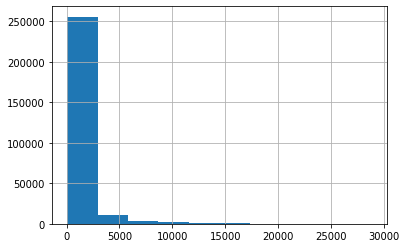

In [89]:
import matplotlib.pyplot as plt
df['tripduration'].hist()

### Adjusting the Plot Style

Matplotlib has a number of plot styles you can use. For example, if you like R you might use the ggplot style:

In [ ]:
plt.style.use("ggplot")

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

In [ ]:
plt.

For example, we can create a histogram of trip durations:

If you'd like to adjust the x and y limits of the plot, you can use the ``set_xlim()`` and ``set_ylim()`` method of the resulting object:

## Breakout: Exploring the Data

Make a plot of the total number of rides as a function of month of the year (You'll need to extract the month, use a ``groupby``, and find the appropriate aggregation to count the number in each group).

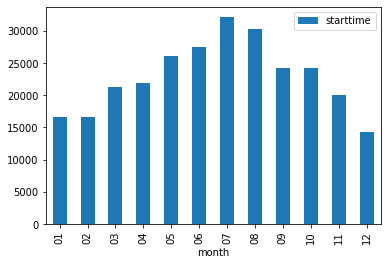

In [39]:
df['month']=df['starttime'].astype(str).str[0:2]
x = df[['starttime','month']].groupby(['month']).count()
x.plot.bar()
#plt.plot(x[:,0],x['starttime'])

Split this plot by gender. Do you see any seasonal ridership patterns by gender?

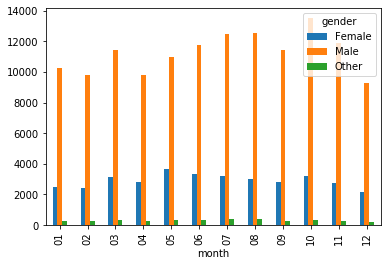

In [41]:
y = df.groupby(['gender','month']).size()
#y.unstack(0)
y.unstack(0).plot.bar()


Split this plot by user type. Do you see any seasonal ridership patterns by usertype?

In [43]:
z = df.groupby(['month','gender','usertype']).size()


Repeat the above three steps, counting the number of rides by time of day rather that by month.

In [62]:
q=df['starttime'].str.split(" ")
l=q.str[1].str.split(":").str[0]
m=q.str[2]
df['tod']=l.str.cat(m,sep="")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,month,tod
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,10,10AM
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,10,10AM
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,10,10AM
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,10,10AM
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,10,10AM


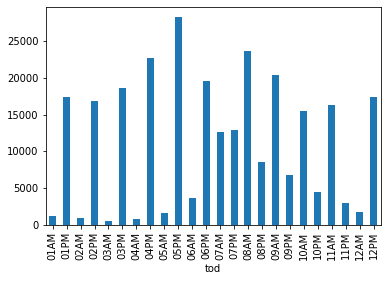

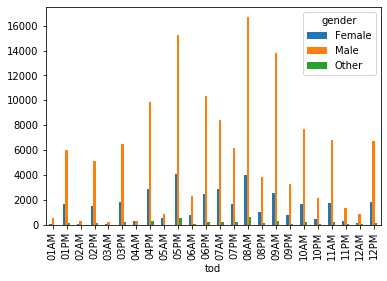

In [64]:
x = df.groupby(['tod']).size()
x.plot.bar()
y = df.groupby(['gender','tod']).size()
y.unstack(0).plot.bar()

Are there any other interesting insights you can discover in the data using these tools?

### Using Files
- Writing and running python modules
- Using python modules in your Jupyter Notebook

In [ ]:
# A script for creating a dataframe with counts of the occurrence of a columns' values
df_count = df.groupby('from_station_id').count()
df_count1 = df_count[['trip_id']]
df_count2 = df_count1.rename(columns={'trip_id': 'count'})

In [ ]:
df_count2.head()

In [ ]:
def make_table_count(df_arg, groupby_column):
    df_count = df_arg.groupby(groupby_column).count()
    column_name = df.columns[0]
    df_count1 = df_count[[column_name]]
    df_count2 = df_count1.rename(columns={column_name: 'count'})
    return df_count2

In [ ]:
dff = make_table_count(df, 'from_station_id')
dff.head()